# NN 다중 분류
- 펭귄 데이터셋

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 792 µs (started: 2024-06-28 06:25:29 +00:00)


In [ ]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

--2024-06-28 06:25:30--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13523 (13K) [text/plain]
Saving to: ‘penguins.csv.1’

penguins.csv.1      100%[===================>]  13.21K  --.-KB/s    in 0s      

2024-06-28 06:25:30 (106 MB/s) - ‘penguins.csv.1’ saved [13523/13523]

time: 209 ms (started: 2024-06-28 06:25:30 +00:00)


In [ ]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.34 s (started: 2024-06-28 06:25:30 +00:00)


1. 데이터 준비

In [ ]:
penguins = pd.read_csv('/content/penguins.csv')
penguins.shape

(344, 7)

time: 14.2 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
df = penguins.copy()
df.head()

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 50.1 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
df.columns = [col.lower().replace(' ', '_').replace('(', '_').replace(')', '') for col in df.columns] # 파라미터 단순화를 위해 살짝 파싱을 해줌
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 24.2 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 24.5 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
# 결측치 존재; 18개 정도
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 6.88 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


time: 33 ms (started: 2024-06-28 06:25:37 +00:00)


### 범주형 변수

In [ ]:
cols_cat = df.select_dtypes(include='object') # object 즉, 값이 수치가 아닌 것들만 골라냄.
cols_cat

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


time: 15.8 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
cols_cat['species'].value_counts() # 각 종이 균등하게 있는지 살펴봄, 아래 수치들도 마찬가지

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

time: 6.46 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
cols_cat['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 6.16 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
cols_cat['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

time: 7.19 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
df['sex'] == '.'

0      False
1      False
2      False
3      False
4      False
       ...  
339    False
340    False
341    False
342    False
343    False
Name: sex, Length: 344, dtype: bool

time: 6.05 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
cols_cat.loc[cols_cat['sex'] == '.', 'sex'] = 'FEMALE' # .인게 하나이니까 밸런스를 위해 그냥 female에 넣어줌. 원래는 이러면 안됨.
cols_cat['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

time: 10.3 ms (started: 2024-06-28 06:25:37 +00:00)


In [ ]:
df.groupby('island')['species'].value_counts() # 각 섬 별로 종의 분포를 알아보기 위함. 이것도 데이터를 분석할 때 중요한 요소.

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

time: 13.4 ms (started: 2024-06-28 06:25:38 +00:00)


### 연속형 변수

In [ ]:
cols_num = df.select_dtypes(include='number')
cols_num

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


time: 20.6 ms (started: 2024-06-28 06:25:38 +00:00)


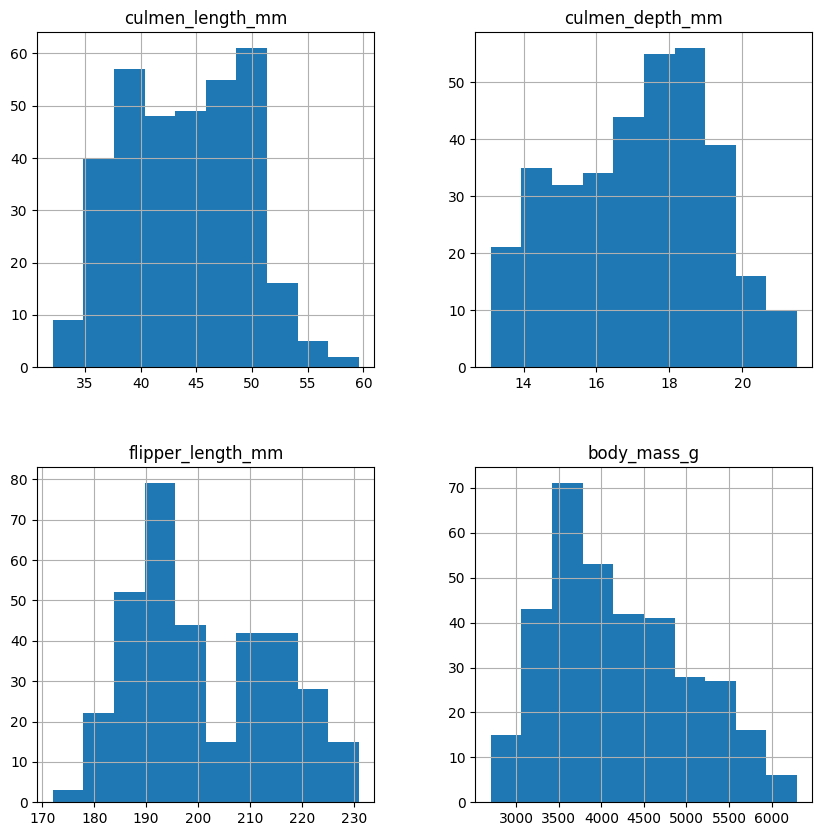

time: 2.18 s (started: 2024-06-28 06:25:38 +00:00)


In [ ]:
cols_num.hist(figsize=(10, 10));

### 이상치

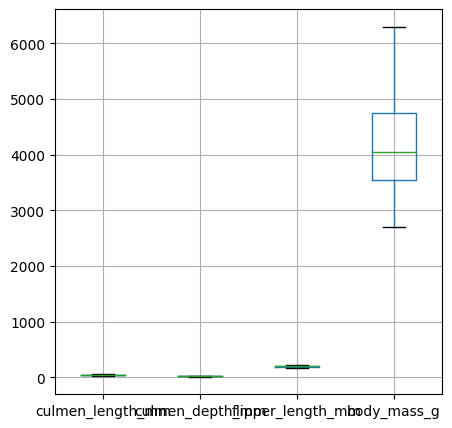

time: 343 ms (started: 2024-06-28 06:25:40 +00:00)


In [ ]:
# 박스 플롯
cols_num.boxplot(figsize=(5, 5));

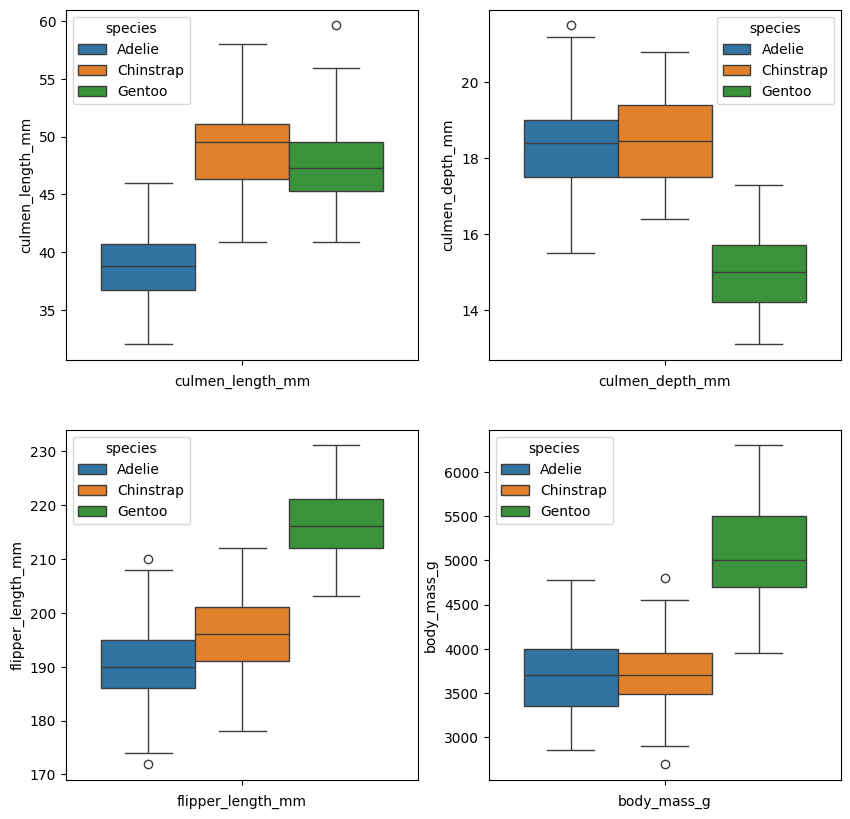

time: 1.69 s (started: 2024-06-28 06:25:40 +00:00)


In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax = ax.flatten()
for i, col in enumerate(cols_num.columns):
  sns.boxplot(y=col, data=cols_num, hue=df['species'], ax=ax[i])
  ax[i].set_xlabel(col)
plt.show()

In [ ]:
# 데이터 분리, 결측치, 인코딩, 학습

time: 11.6 ms (started: 2024-06-28 06:25:42 +00:00)


## 2. 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state= 42, stratify=df['species']) # 데이터 중에서 20퍼센트를 테스트 용으로 사용

train.shape, test.shape

((275, 7), (69, 7))

time: 340 ms (started: 2024-06-28 06:25:42 +00:00)


### 결측치 처리

In [ ]:
train.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 46.2 ms (started: 2024-06-28 06:25:42 +00:00)


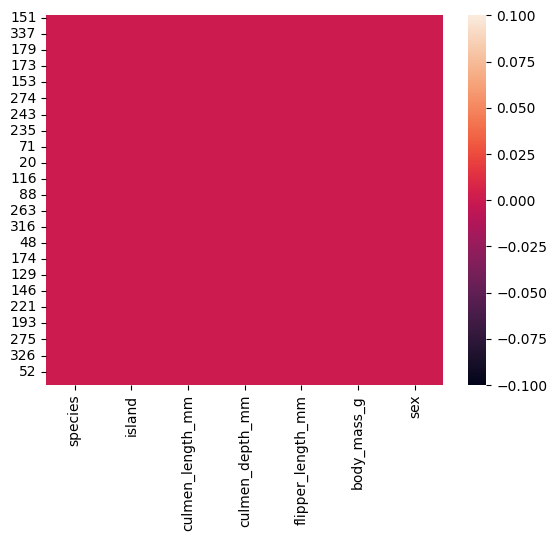

time: 882 ms (started: 2024-06-28 06:25:42 +00:00)


In [ ]:
# sns.heatmap(train.isna());
sns.heatmap(test.isna());

In [ ]:
train = train.dropna() # 결측치가 있는게 별로 없으니까 그냥 다 날려버림

time: 10.1 ms (started: 2024-06-28 06:25:43 +00:00)


### X, y 분리

In [ ]:
X_train = train.drop('species', axis=1)
y_train = train['species']

X_train.shape, y_train.shape

((265, 6), (265,))

time: 7.58 ms (started: 2024-06-28 06:25:43 +00:00)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder() # 입력 데이터 중 범주형 데이터를 수치형으로 변환하는 과정. 머신러닝 모델은 수치형만 이해를 함.

X_train[['island', 'sex']] = oe.fit_transform(X_train[['island', 'sex']])
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,1.0,33.1,16.1,178.0,2900.0,1.0
114,0.0,39.6,20.7,191.0,3900.0,1.0
118,2.0,35.7,17.0,189.0,3350.0,1.0
303,0.0,50.0,15.9,224.0,5350.0,2.0
343,0.0,49.9,16.1,213.0,5400.0,2.0


time: 72.2 ms (started: 2024-06-28 06:25:43 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # 타겟 값이 범주형일 경우 수치형으로 변환. 일반적으로 입력 데이터에는 ordinal을, 타겟 값에는 label encoder를 사용함.

y_train = le.fit_transform(y_train)
y_train

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

time: 12 ms (started: 2024-06-28 06:25:43 +00:00)


### 스케일링

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler() # robust scaler는 이상치에 영향을 덜 받는 방식의 스케일링을 구현할 수 있음.

X_train_s = rs.fit_transform(X_train)
X_train_s


array([[ 0.        , -1.31868132, -0.375     , -0.82608696, -0.92      ,
        -1.        ],
       [-1.        , -0.6043956 ,  1.0625    , -0.26086957, -0.12      ,
        -1.        ],
       [ 1.        , -1.03296703, -0.09375   , -0.34782609, -0.56      ,
        -1.        ],
       ...,
       [ 1.        , -0.25274725,  0.375     , -0.08695652,  0.16      ,
         0.        ],
       [ 1.        , -0.92307692,  0.46875   , -0.43478261, -0.2       ,
        -1.        ],
       [ 0.        ,  0.62637363,  0.53125   ,  0.56521739,  0.04      ,
         0.        ]])

time: 17.8 ms (started: 2024-06-28 06:25:43 +00:00)


## 3. 모델 학습

In [ ]:
X_train_s.shape, y_train.shape

((265, 6), (265,))

time: 4.85 ms (started: 2024-06-28 06:25:43 +00:00)


In [ ]:
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(units=16, activation='relu', input_shape= (6,)),
        layers.Dense(units=8, activation='relu'),
        layers.Dense(units=3, activation='softmax'), # 총 3개의 결과를 output으로, 다중 분류에서는 sigmoid가 아니라 softmax를 사용함.
    ]
)

time: 173 ms (started: 2024-06-28 06:25:44 +00:00)


In [ ]:
y_train

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

time: 9.79 ms (started: 2024-06-28 06:27:00 +00:00)


In [ ]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_train_o

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0

time: 28.6 ms (started: 2024-06-28 06:38:58 +00:00)


In [ ]:
print(X_train_s.shape, y_train_o.shape)

(265, 6) (265, 3)
time: 6.01 ms (started: 2024-06-28 06:43:03 +00:00)


In [ ]:
model.compile(
    loss= 'categorical_crossentropy', # 다중 분류이므로 categorical을 사용함.
    optimizer= 'adam',
    metrics= ['accuracy']
)

time: 113 ms (started: 2024-06-28 06:44:47 +00:00)


In [ ]:
epochs = 100
batch_size = 16

history = model.fit(
    X_train_s,
    y_train_o,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/100
14/14 [==============================] - 3s 33ms/step - loss: 1.1295 - accuracy: 0.5094 - val_loss: 1.1320 - val_accuracy: 0.4340
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 1.0647 - accuracy: 0.5566 - val_loss: 1.0876 - val_accuracy: 0.4717
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 1.0097 - accuracy: 0.5802 - val_loss: 1.0480 - val_accuracy: 0.4717
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9660 - accuracy: 0.5472 - val_loss: 1.0102 - val_accuracy: 0.4528
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9269 - accuracy: 0.5425 - val_loss: 0.9802 - val_accuracy: 0.4528
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.8910 - accuracy: 0.5472 - val_loss: 0.9476 - val_accuracy: 0.4528
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.8522 - accuracy: 0.5472 - val_loss: 0.9110 - val_accuracy: 0.5094
Epoch 8/100


In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 2.55 ms (started: 2024-06-28 06:47:50 +00:00)


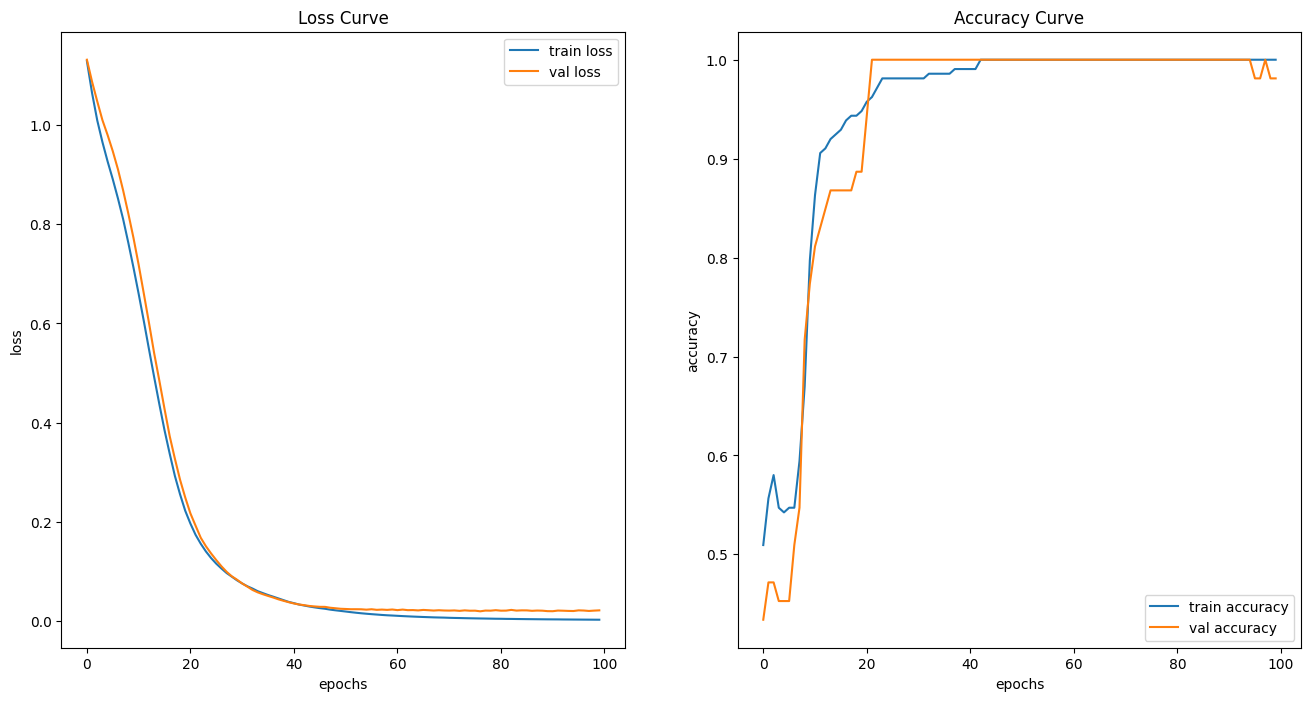

time: 1.53 s (started: 2024-06-28 06:47:53 +00:00)


In [ ]:
plot_history(history)

## 예측

In [ ]:
X_test_s = X_train_s.copy()
y_test_e = y_train.copy()

time: 691 µs (started: 2024-06-28 06:50:40 +00:00)


In [ ]:
y_pred = model.predict(X_test_s)

9/9 [==============================] - 0s 3ms/step
time: 313 ms (started: 2024-06-28 06:51:04 +00:00)


In [ ]:
y_pred

array([[9.99510229e-01, 2.97700230e-04, 1.91995729e-04],
       [9.99668121e-01, 2.94870290e-04, 3.70327216e-05],
       [9.99697685e-01, 2.85965089e-05, 2.73763959e-04],
       [2.82365818e-05, 1.04394985e-05, 9.99961317e-01],
       [7.17948860e-05, 3.37729107e-05, 9.99894321e-01],
       [4.73454304e-04, 1.99929127e-05, 9.99506533e-01],
       [9.88686264e-01, 8.14396143e-03, 3.16991913e-03],
       [1.06537664e-04, 3.00386964e-05, 9.99863386e-01],
       [2.07680554e-04, 9.99189556e-01, 6.02742075e-04],
       [1.49276566e-05, 9.67437518e-06, 9.99975383e-01],
       [9.99253511e-01, 6.89416484e-04, 5.70051780e-05],
       [9.77793455e-01, 2.00838558e-02, 2.12274119e-03],
       [6.97916985e-05, 8.14286876e-04, 9.99115825e-01],
       [1.39752927e-04, 2.44850293e-04, 9.99615371e-01],
       [9.99962389e-01, 1.11889094e-05, 2.63204965e-05],
       [1.71705426e-04, 2.37513323e-05, 9.99804497e-01],
       [9.45338888e-06, 1.66712562e-06, 9.99988854e-01],
       [9.99855995e-01, 1.07651

time: 61.8 ms (started: 2024-06-28 06:51:11 +00:00)


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

time: 9.97 ms (started: 2024-06-28 06:55:18 +00:00)


accuracy: 0.9962264150943396
recall: 0.9971264367816092
precision: 0.993939393939394
f1: 0.9954988945814635


<Axes: >

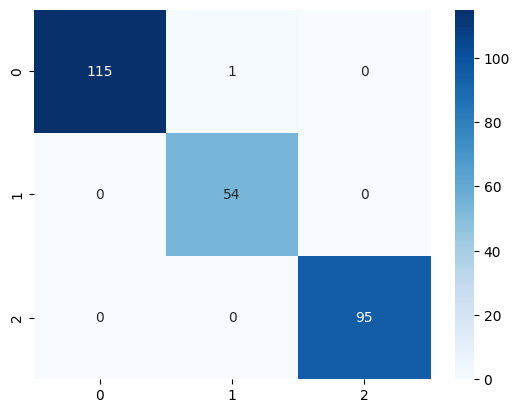

time: 722 ms (started: 2024-06-28 06:57:04 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

print(f'accuracy: {accuracy_score(y_test_e, y_pred)}')
print(f'recall: {recall_score(y_test_e, y_pred, average="macro")}')
print(f'precision: {precision_score(y_test_e, y_pred, average="macro")}')
print(f'f1: {f1_score(y_test_e, y_pred, average="macro")}')

sns.heatmap(confusion_matrix(y_test_e, y_pred), annot=True, cmap='Blues', fmt='d')